In [56]:
import geopy
from geopy.geocoders import Nominatim
import pandas as pd
import time
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import folium
import json
from pandas import Timestamp

In [114]:
url = 'https://github.com/uchicago-dsi/IL_CEI/tree/Angelica_Sun_main_update/cdf/data/input/IL_census_data.csv'
df = pd.read_csv(url)

In [115]:
df = df.rename(columns={'geoid': 'GEOID', 'geometry': 'geometry1'})
df.shape

(3265, 26)

In [116]:
df.head(3)

,GEOID,qualifying name,current land area (sq. m),current water area (sq. m),Total population,population density (per sq. mile),Total population: male,Total population: female,Total population: white alone,Total population: black or african american alone,...,population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelors degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,Gini Index,Median Gross Rent
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,2171,321.2528,1026,1145,2082,0,...,1397,132,1265,725,198,51,10,10,0.3710,700
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,2051,18.3350,1017,1034,2003,12,...,1469,121,1348,889,172,56,17,15,0.3561,443
2,17167003901,"Census Tract 39.01, Sangamon County, Illinois",107283391,1202385,5296,127.8537,2711,2585,5176,16,...,3750,55,3695,2842,1731,641,96,27,0.3684,1163


In [118]:
# Load GeoDataFrame
gdf = gpd.read_file("C:/Users/user/Downloads/DSI/CEI/tl_2022_17_tract/tl_2022_17_tract.shp")

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf.__geo_interface__

# Create a folium map with auto-zoom and auto-center
map = folium.Map(location=[0, 0], zoom_start=10)

# Add GeoJSON layer to the map
folium.GeoJson(geojson_data).add_to(map)

# Save the map as an HTML file
#output_file = ("C:/Users/user/Downloads/DSI/CEI/output_file.html")
#m.save(output_file)


In [96]:
gdf.head(3)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,019,010701,17019010701,107.01,Census Tract 107.01,G5020,S,5266000,30553,+40.1150269,-088.0329549,"POLYGON ((-88.05240 40.11923, -88.05238 40.119..."
1,17,019,005902,17019005902,59.02,Census Tract 59.02,G5020,S,962402,4892,+40.1087344,-088.2247204,"POLYGON ((-88.22891 40.11271, -88.22882 40.112..."
2,17,019,011001,17019011001,110.01,Census Tract 110.01,G5020,S,815140,0,+40.1196851,-088.2513464,"POLYGON ((-88.25792 40.12215, -88.25792 40.122..."


In [119]:
# Convert geoid column to object type in both datasets
gdf['GEOID'] = gdf['GEOID'].astype(str)
df['GEOID'] = df['GEOID'].astype(str)

# Merge the GDF and CSV data using pd.concat
merged_data = pd.concat([gdf.set_index('GEOID'), df.set_index('GEOID')], axis=1, join='outer').reset_index()

# Create the merged GeoDataFrame using the original geometry column
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

merged_gdf.to_file("C:/Users/user/Downloads/DSI/CEI/tl_2022_17_tract/merged.gdf", driver='GPKG')

In [120]:
# Load GeoDataFrame
gdf = gpd.read_file("C:/Users/user/Downloads/DSI/CEI/tl_2022_17_tract/merged.gdf")

# # Convert GeoDataFrame to GeoJSON
# geojson_data = gdf.__geo_interface__

# # Create a folium map with auto-zoom and auto-center
# map2 = folium.Map(location=[0, 0], zoom_start=10)

# # Add GeoJSON layer to the map
# folium.GeoJson(geojson_data).add_to(map2)

# # Save the map as an HTML file
# #output_file = ("C:/Users/user/Downloads/DSI/CEI/output_file.html")
# #m.save(output_file)

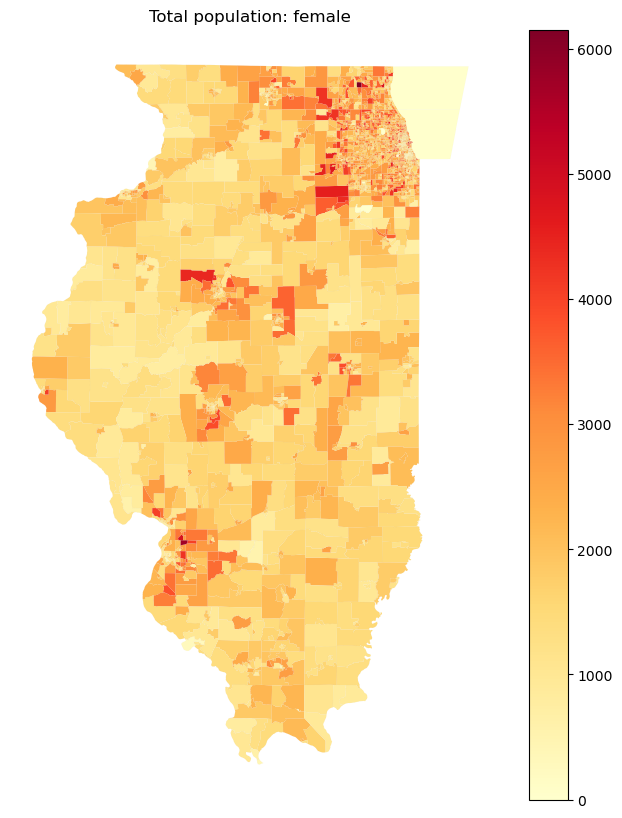

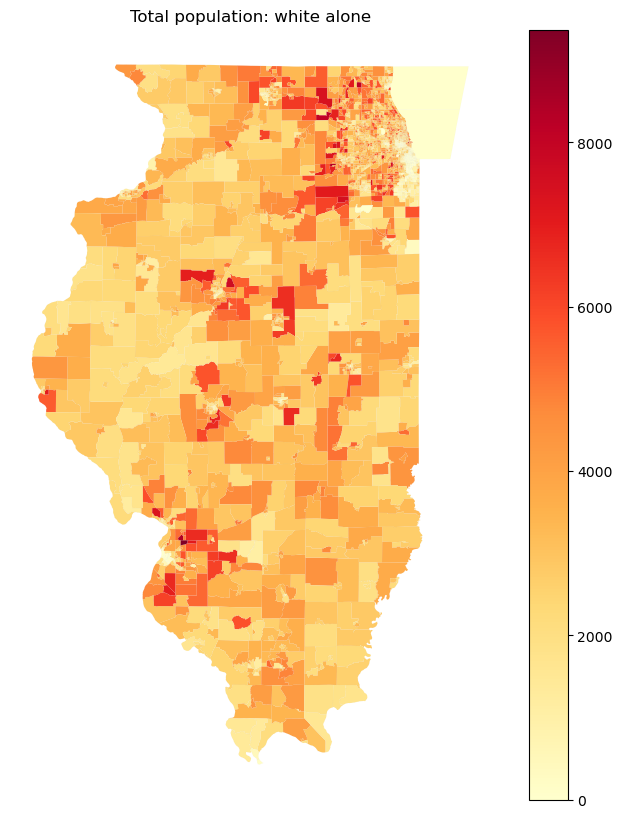

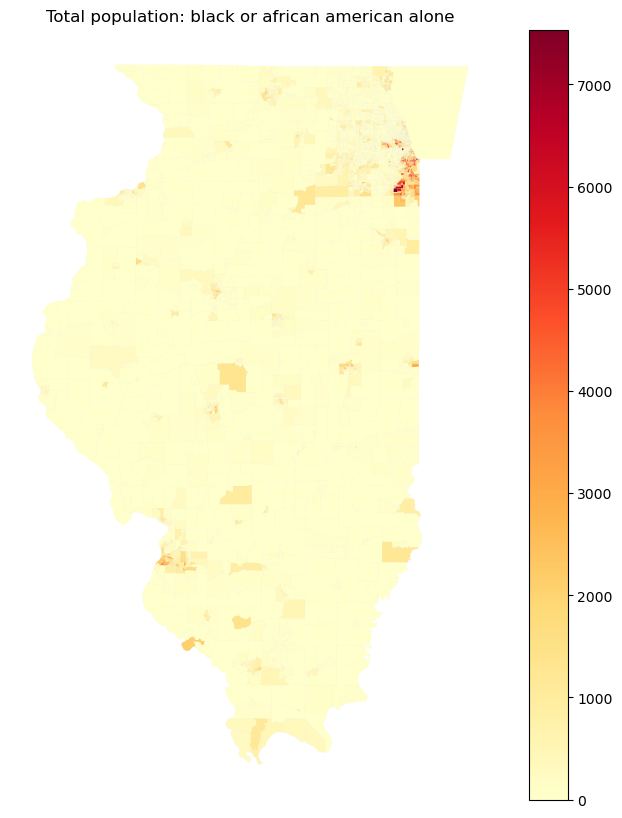

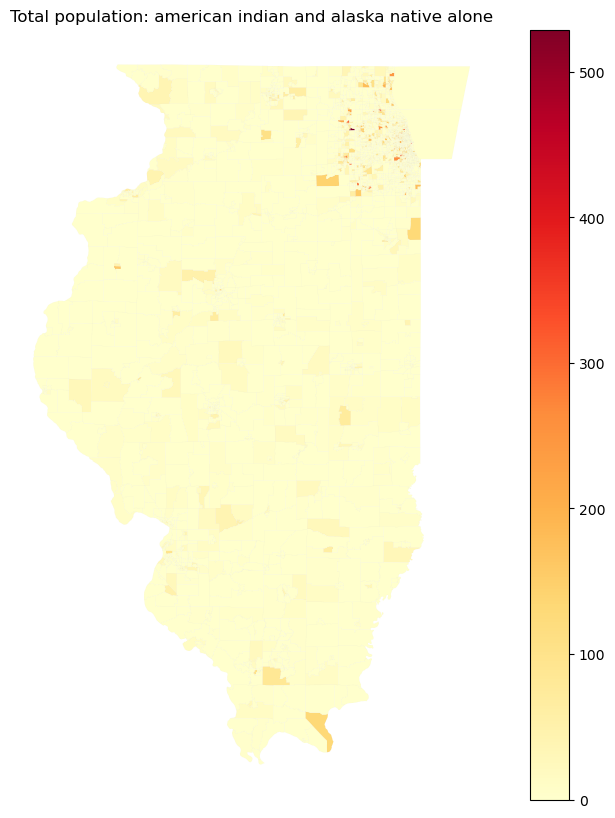

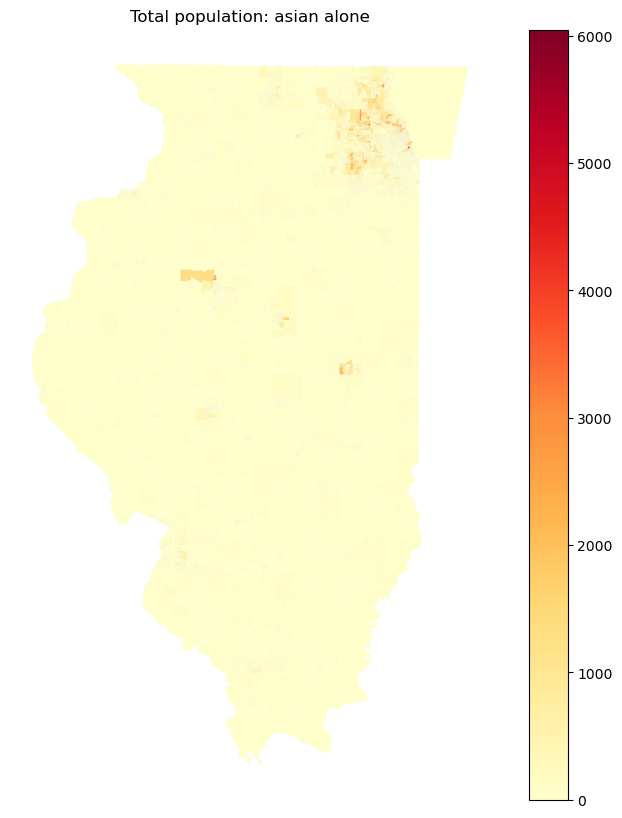

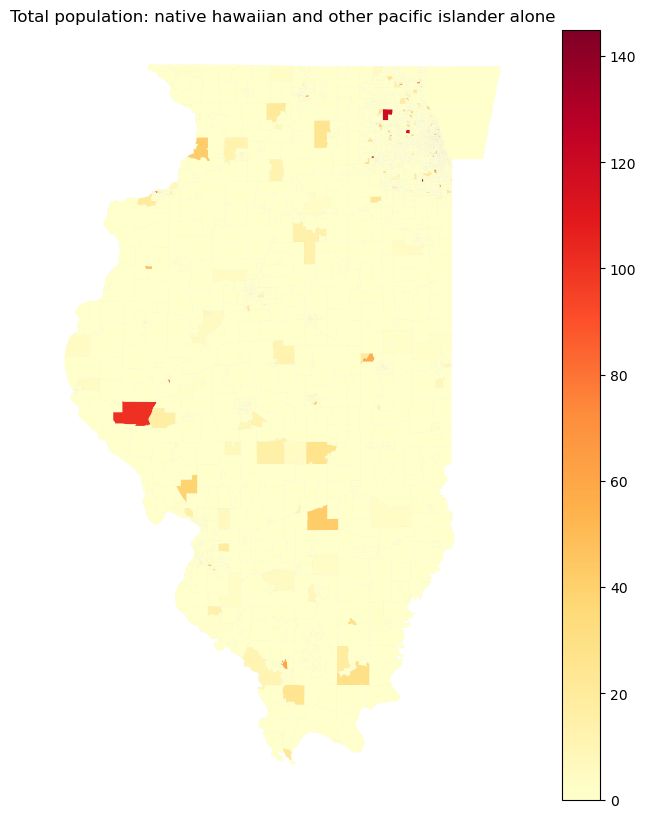

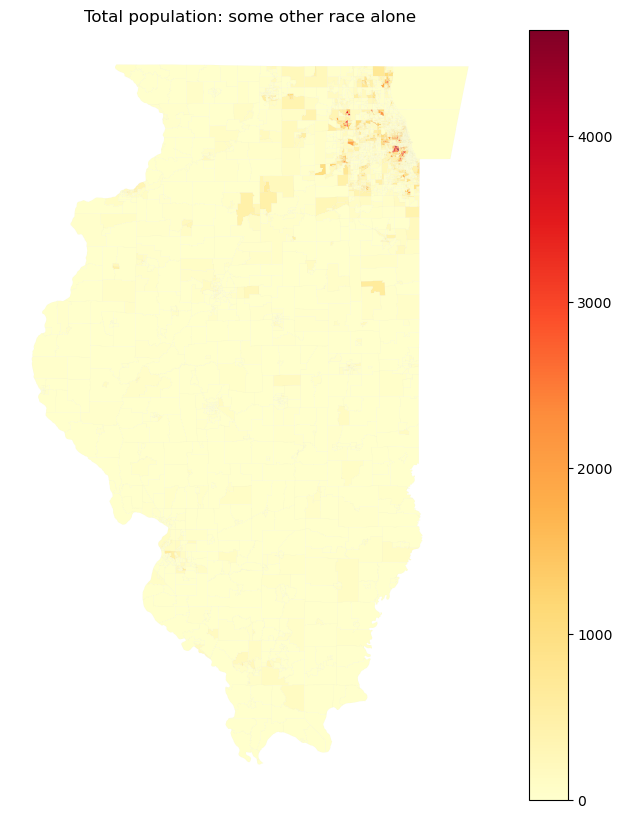

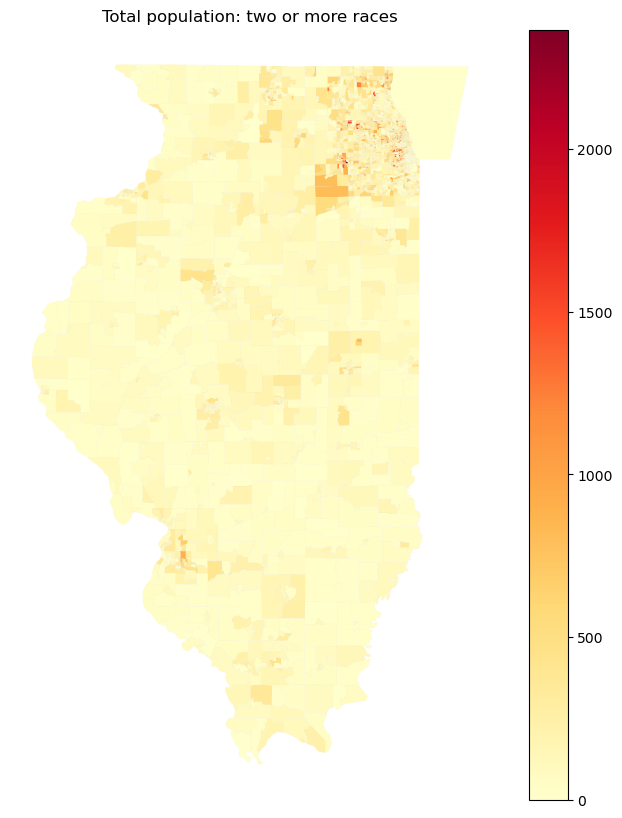

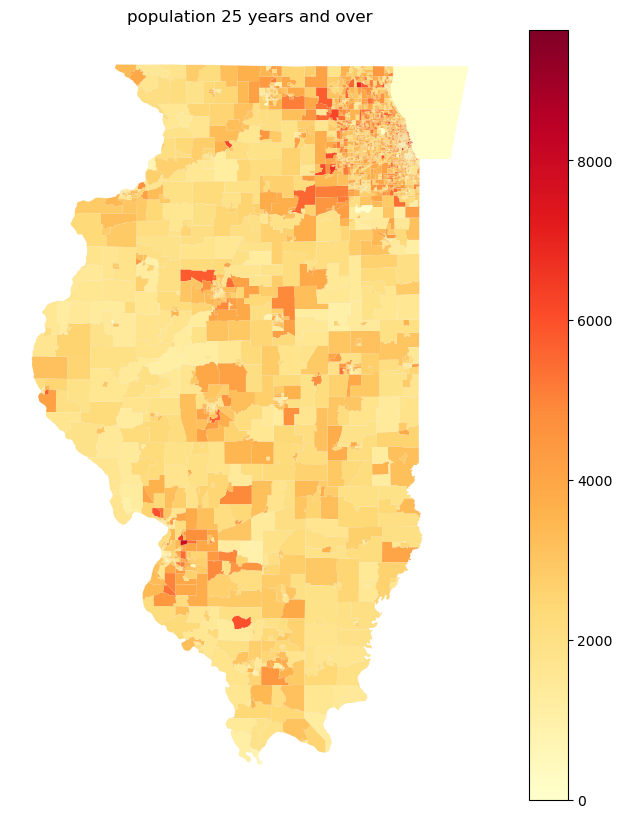

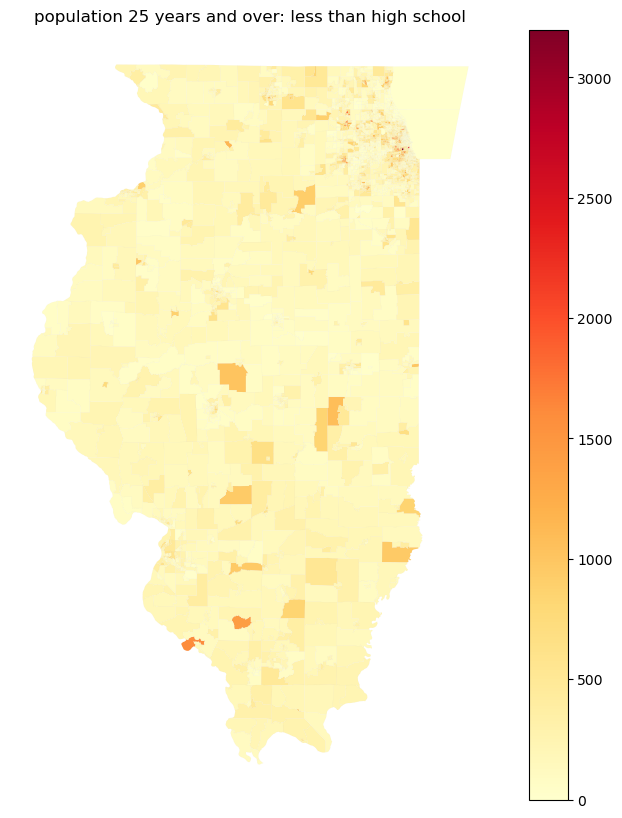

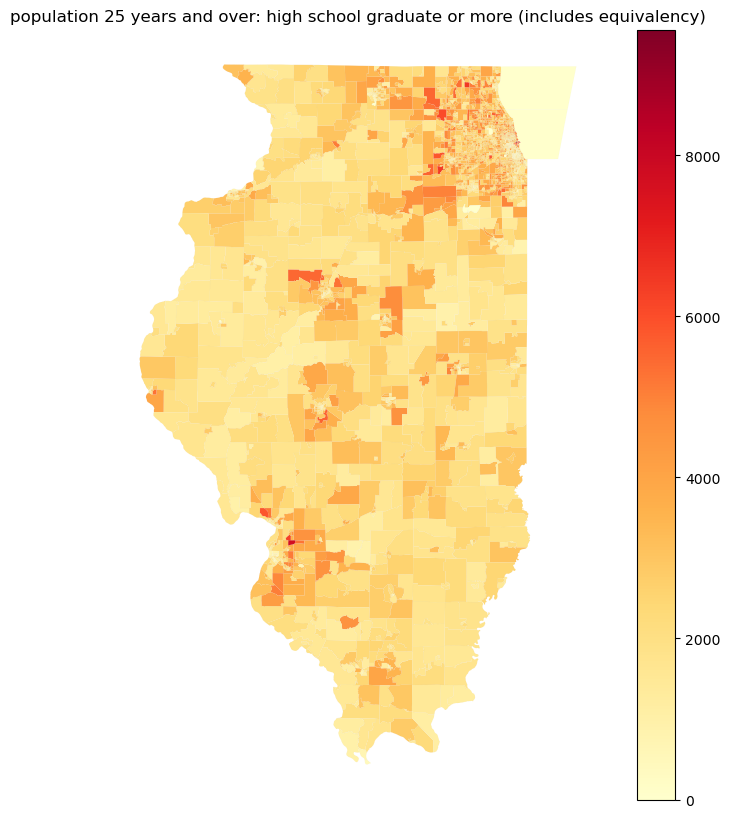

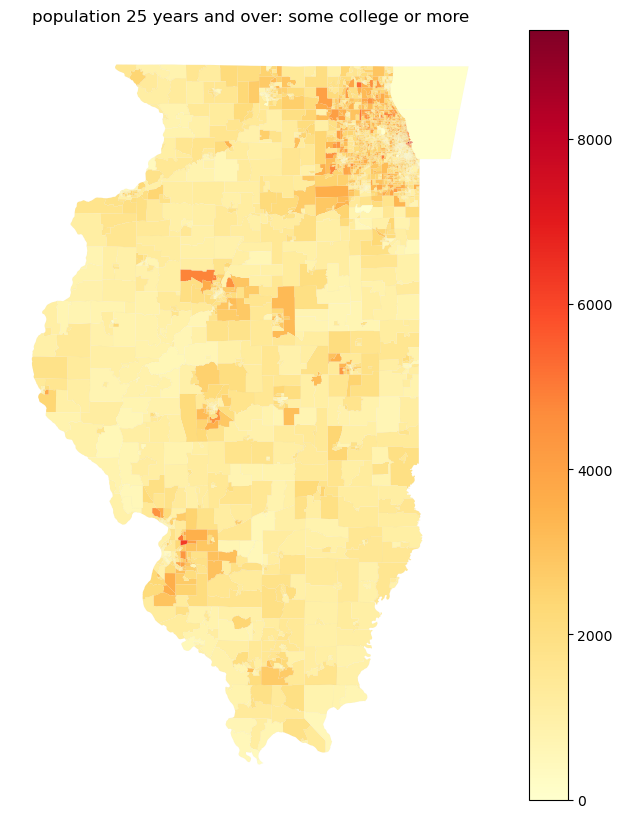

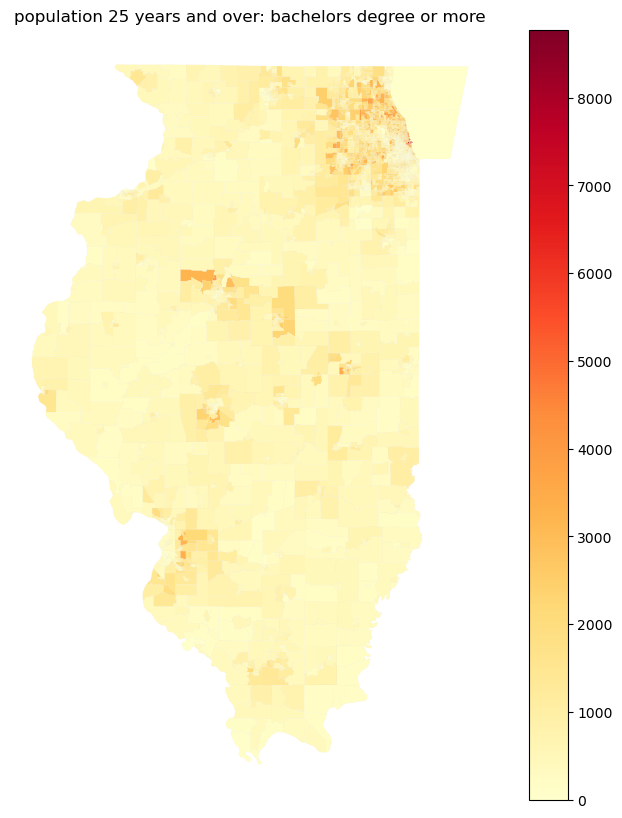

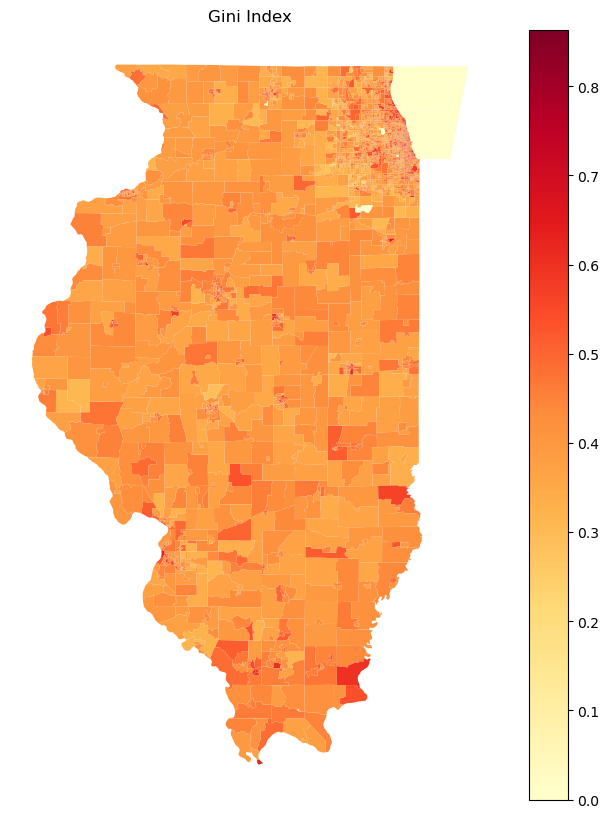

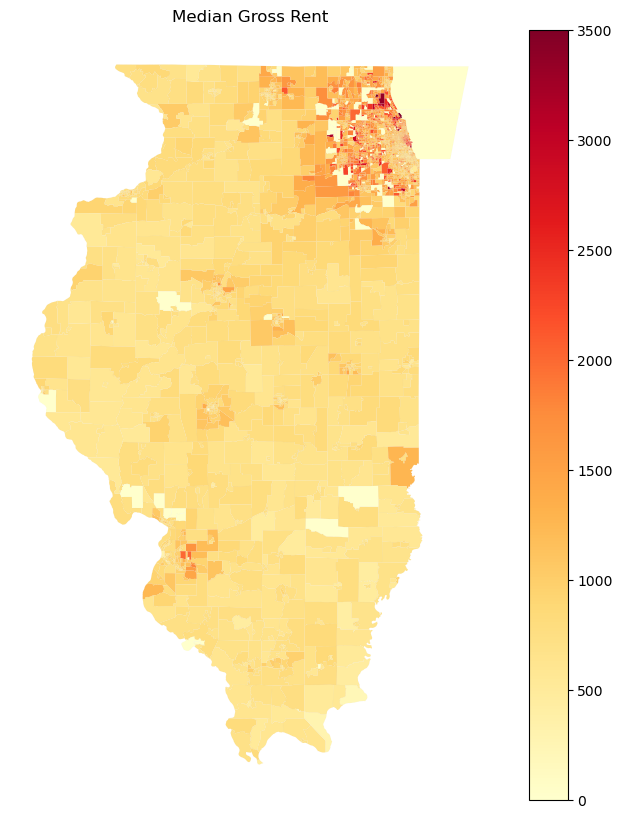

In [136]:
cols = ['Total population: female', 'Total population: white alone', 'Total population: black or african american alone',
        'Total population: american indian and alaska native alone', 'Total population: asian alone', 'Total population: native hawaiian and other pacific islander alone',
        'Total population: some other race alone', 'Total population: two or more races', 'population 25 years and over',
        'population 25 years and over: less than high school', 'population 25 years and over: high school graduate or more (includes equivalency)',
        'population 25 years and over: some college or more', 'population 25 years and over: bachelors degree or more', 'Gini Index', 'Median Gross Rent']


for col in cols:
    # Plot the heatmap of the 'population' column
    fig, ax = plt.subplots(figsize=(10, 10))

    gdf.plot(column=col, cmap='YlOrRd', linewidth=0.02, ax=ax, edgecolor='0.8', legend=True)

    # Customize the plot
    ax.set_title(col)
    ax.axis('off')

    # Display the plot
    plt.show()